In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating unique primary key
p_k = np.array(range(1,1001,1))
p_k[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
#creating random percent
percent = np.random.rand(len(p_k))*100
percent[:10]

array([ 2.93427653, 42.9398576 , 46.25492442, 61.56756267, 94.52448383,
       11.0941029 , 99.2121582 , 16.43769368, 61.21388402, 87.30696416])

In [4]:
df = pd.DataFrame({
    "id":p_k,
    "percent":percent
})
df.head()

,id,percent
0,1,2.934277
1,2,42.939858
2,3,46.254924
3,4,61.567563
4,5,94.524484


In [28]:
#assigning deciles
vectorizer = np.vectorize(lambda x: int(x/10)+1)
df['deciles']= vectorizer(percent)
df['pentile'] = np.vectorize(lambda x: int(x/5)+1)(percent)
df.head()

,id,percent,deciles,cat,pentile
0,1,2.934277,1,IVR,1
1,2,42.939858,5,Auto Transfer,9
2,3,46.254924,5,IVR,10
3,4,61.567563,7,Live,13
4,5,94.524484,10,Live,19


In [29]:
df.deciles.value_counts()

5     118
10    112
8     107
2     100
9      99
7      98
4      93
6      92
1      91
3      90
Name: deciles, dtype: int64

In [30]:
df.deciles.unique()

array([ 1,  5,  7, 10,  2,  9,  4,  8,  6,  3], dtype=int64)

In [31]:
#create cat
dist = {
    1: (.10,.60,.30),
    2: (.40,.40,.20),
    3: (.10,.50,.40),
    4: (.30,.60,.10),
    5: (.40,.40,.20),
    6: (.30,.30,.40),
    7: (.10,.20,.70),
    8: (.20,.30,.50),
    9: (.25,.50,.25),
    10: (.10,.30,.60)
}

def getArray(dec,size):
    return np.random.choice(["Auto Transfer","IVR","Live"], size=size, p=dist[dec])

In [32]:
df['cat'] = np.NaN
for i in df.deciles.unique():
    df.loc[ df[ df.deciles==i ].index, "cat" ] = getArray(i,len(df[ df.deciles==i ]))
df.head()

,id,percent,deciles,cat,pentile
0,1,2.934277,1,Live,1
1,2,42.939858,5,IVR,9
2,3,46.254924,5,IVR,10
3,4,61.567563,7,Live,13
4,5,94.524484,10,IVR,19


In [33]:
df[df.deciles==1].head()

,id,percent,deciles,cat,pentile
0,1,2.934277,1,Live,1
12,13,9.298438,1,Live,2
16,17,7.759294,1,Live,2
62,63,3.067124,1,Live,1
72,73,8.553616,1,Live,2


In [112]:
df_new = df.groupby(['deciles','pentile'])['cat'].value_counts()
df_new

deciles  pentile  cat          
1        1        IVR              26
                  Live             19
                  Auto Transfer     4
         2        IVR              24
                  Live             13
                  Auto Transfer     5
2        3        Auto Transfer    22
                  IVR              22
                  Live              9
         4        IVR              22
                  Auto Transfer    17
                  Live              8
3        5        IVR              22
                  Live             18
                  Auto Transfer     5
         6        IVR              23
                  Live             20
                  Auto Transfer     2
4        7        IVR              27
                  Auto Transfer    19
                  Live              5
         8        IVR              22
                  Auto Transfer    16
                  Live              4
5        9        IVR              25
                  

In [113]:
df_new = df_new.unstack(['cat'])
df_new

cat              Auto Transfer  IVR  Live
deciles pentile                          
1       1                    4   26    19
        2                    5   24    13
2       3                   22   22     9
        4                   17   22     8
3       5                    5   22    18
        6                    2   23    20
4       7                   19   27     5
        8                   16   22     4
5       9                   22   25    12
        10                  18   28    13
6       11                  10   14    26
        12                   8   16    18
7       13                   2    7    38
        14                   2    9    40
8       15                   5   20    30
        16                  13   13    26
9       17                   8   26    16
        18                  16   24     9
10      19                   7   16    25
        20                   6   21    37

In [61]:
df_new.stack()

deciles  pentile  cat          
1        1        Auto Transfer     4
                  IVR              26
                  Live             19
         2        Auto Transfer     5
                  IVR              24
                  Live             13
2        3        Auto Transfer    22
                  IVR              22
                  Live              9
         4        Auto Transfer    17
                  IVR              22
                  Live              8
3        5        Auto Transfer     5
                  IVR              22
                  Live             18
         6        Auto Transfer     2
                  IVR              23
                  Live             20
4        7        Auto Transfer    19
                  IVR              27
                  Live              5
         8        Auto Transfer    16
                  IVR              22
                  Live              4
5        9        Auto Transfer    22
                  

In [17]:
pd.crosstab(df.deciles,df.cat)

cat,Auto Transfer,IVR,Live
deciles,,,
1,7,58,26
2,46,39,15
3,6,49,35
4,24,61,8
5,45,49,24
6,22,30,40
7,8,15,75
8,20,29,58
9,26,48,25


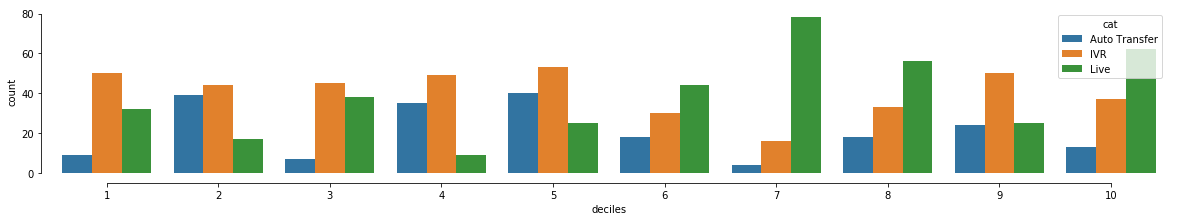

In [481]:
fig,ax = plt.subplots(figsize=(20,3),nrows=1,ncols=1)
sns.countplot( x="deciles", hue="cat", data=df,hue_order=["Auto Transfer","IVR","Live"],ax=ax)
sns.despine(offset=10,trim=True,)

In [153]:
df.head()

,id,percent,deciles,cat
0,1,78.729933,8,IVR
1,2,27.413555,3,Live
2,3,72.960509,8,IVR
3,4,53.702763,6,Live
4,5,47.163098,5,IVR


In [214]:
def temp(r): #must take a series and must a return a series
    if r.name==2: print(r,type(r))
    return r/r.sum()*100
df_new = pd.crosstab(df.deciles,df.cat).apply(temp, axis=1)
df_new.head(10)

cat
Auto Transfer    33
IVR              46
Live             22
Name: 2, dtype: int64 <class 'pandas.core.series.Series'>


cat,Auto Transfer,IVR,Live
deciles,,,
1,11.224490,64.285714,24.489796
2,32.673267,45.544554,21.782178
3,7.692308,55.769231,36.538462
4,25.000000,67.592593,7.407407
5,45.098039,38.235294,16.666667
6,31.683168,24.752475,43.564356
7,9.259259,19.444444,71.296296
8,18.556701,27.835052,53.608247
9,31.325301,44.578313,24.096386


In [64]:
df_new.apply(lambda x: x.sum() , axis=0)

cat
Auto Transfer    207
IVR              407
Live             386
dtype: int64

In [80]:
pd.pivot_table(df,index=["deciles","pentile"],columns="cat",values="percent")

cat              Auto Transfer        IVR       Live
deciles pentile                                     
1       1             3.002583   2.399827   2.622971
        2             8.064047   7.351694   7.416806
2       3            12.367307  12.408968  12.665168
        4            17.406126  17.660649  17.035633
3       5            21.981134  22.568557  22.076402
        6            27.725632  27.459566  28.128363
4       7            33.057596  32.735693  31.519203
        8            38.094070  37.287743  37.051457
5       9            42.786104  42.542465  42.156580
        10           47.641013  47.034581  47.762941
6       11           53.334229  51.898113  52.812481
        12           56.895892  57.219254  57.285252
7       13           63.486079  63.426252  62.568140
        14           68.182829  67.160620  67.821602
8       15           71.446786  72.663438  72.774738
        16           78.218145  77.777703  77.452658
9       17           82.249814  82.308554  81.680638
        18           88.096529  87.115987  87.183971
10      19           92.257376  92.509562  92.675591
        20           98.350504  97.309579  97.445760

In [440]:
temp = pd.crosstab([df.deciles,df.pentile],df.cat)
temp.head()

cat              Auto Transfer  IVR  Live
deciles pentile                          
1       1                    4   26    19
        2                    5   24    13
2       3                   22   22     9
        4                   17   22     8
3       5                    5   22    18

In [274]:
temp = pd.crosstab(df.deciles,df.cat)
temp.reset_index(level="deciles",inplace=True)
temp.head()

cat,deciles,Auto Transfer,IVR,Live
0,1,9,50,32
1,2,39,44,17
2,3,7,45,38
3,4,35,49,9
4,5,40,53,25


In [275]:
pd.melt(temp,id_vars=['deciles'],value_vars=["Auto Transfer","IVR","Live"],var_name="Category",value_name="Score")

,deciles,Category,Score
0,1,Auto Transfer,9
1,2,Auto Transfer,39
2,3,Auto Transfer,7
3,4,Auto Transfer,35
4,5,Auto Transfer,40
5,6,Auto Transfer,18
6,7,Auto Transfer,4
7,8,Auto Transfer,18
8,9,Auto Transfer,24
9,10,Auto Transfer,13


In [191]:
datelisttemp = pd.date_range('1/1/2014', periods=3, freq='D')
s = list(datelisttemp)*3
s.sort()
test = pd.DataFrame({'BORDER':['GERMANY','FRANCE','ITALY','GERMANY','FRANCE','ITALY','GERMANY','FRANCE','ITALY' ], 'HOUR1':[2 ,2 ,2 ,4 ,4 ,4 ,6 ,6, 6],'HOUR2':[3 ,3 ,3, 5 ,5 ,5, 7, 7, 7], 'HOUR3':[8 ,8 ,8, 12 ,12 ,12, 99, 99, 99]},index=s)
test.head()

,BORDER,HOUR1,HOUR2,HOUR3
2014-01-01,GERMANY,2,3,8
2014-01-01,FRANCE,2,3,8
2014-01-01,ITALY,2,3,8
2014-01-02,GERMANY,4,5,12
2014-01-02,FRANCE,4,5,12


In [192]:
test = test.set_index("BORDER",append=True)
test.head()

HOUR1  HOUR2  HOUR3
           BORDER                      
2014-01-01 GERMANY      2      3      8
           FRANCE       2      3      8
           ITALY        2      3      8
2014-01-02 GERMANY      4      5     12
           FRANCE       4      5     12

In [193]:
test = test.unstack("BORDER")
test.head()

HOUR1                HOUR2                HOUR3              
BORDER     FRANCE GERMANY ITALY FRANCE GERMANY ITALY FRANCE GERMANY ITALY
2014-01-01      2       2     2      3       3     3      8       8     8
2014-01-02      4       4     4      5       5     5     12      12    12
2014-01-03      6       6     6      7       7     7     99      99    99

In [194]:
test = test.stack(0)
test.head()

BORDER            FRANCE  GERMANY  ITALY
2014-01-01 HOUR1       2        2      2
           HOUR2       3        3      3
           HOUR3       8        8      8
2014-01-02 HOUR1       4        4      4
           HOUR2       5        5      5

In [195]:
test.reset_index(level=-1,inplace=True)
test.level_1 = test.level_1.str.replace("HOUR","")
test.rename(columns={"level_1":"HOUR"},inplace=True)
test.astype({"HOUR":int},inplace=True)

BORDER,HOUR,FRANCE,GERMANY,ITALY
2014-01-01,1,2,2,2
2014-01-01,2,3,3,3
2014-01-01,3,8,8,8
2014-01-02,1,4,4,4
2014-01-02,2,5,5,5
2014-01-02,3,12,12,12
2014-01-03,1,6,6,6
2014-01-03,2,7,7,7
2014-01-03,3,99,99,99


In [243]:
import re
def patternMatcher(x):
    return len(re.findall("^(auto|li)", x, flags=re.IGNORECASE))>0
df['regex'] = df['cat'].apply(patternMatcher)
df.head(10)

,id,percent,deciles,cat,pentile,regex
0,1,2.934277,1,Live,1,True
1,2,42.939858,5,IVR,9,False
2,3,46.254924,5,IVR,10,False
3,4,61.567563,7,Live,13,True
4,5,94.524484,10,IVR,19,False
5,6,11.094103,2,IVR,3,False
6,7,99.212158,10,Auto Transfer,20,True
7,8,16.437694,2,Auto Transfer,4,True
8,9,61.213884,7,Live,13,True
9,10,87.306964,9,Live,18,True


In [247]:
df['cumpentile'] = df.pentile.cumsum()
df.head()

,id,percent,deciles,cat,pentile,regex,cumpentile
0,1,2.934277,1,Live,1,True,1
1,2,42.939858,5,IVR,9,False,10
2,3,46.254924,5,IVR,10,False,20
3,4,61.567563,7,Live,13,True,33
4,5,94.524484,10,IVR,19,False,52


In [251]:
df['evenDeciles'] = df.deciles.isin(range(2,11,2))
df.head(10)

,id,percent,deciles,cat,pentile,regex,cumpentile,evenDeciles
0,1,2.934277,1,Live,1,True,1,False
1,2,42.939858,5,IVR,9,False,10,False
2,3,46.254924,5,IVR,10,False,20,False
3,4,61.567563,7,Live,13,True,33,False
4,5,94.524484,10,IVR,19,False,52,True
5,6,11.094103,2,IVR,3,False,55,True
6,7,99.212158,10,Auto Transfer,20,True,75,True
7,8,16.437694,2,Auto Transfer,4,True,79,True
8,9,61.213884,7,Live,13,True,92,False
9,10,87.306964,9,Live,18,True,110,False


In [263]:
df['prange'] = pd.cut(df.percent,bins=range(0,101,10),include_lowest=True)
df.head()

,id,percent,deciles,cat,pentile,regex,cumpentile,evenDeciles,prange
0,1,2.934277,1,Live,1,True,1,False,"(-0.001, 10.0]"
1,2,42.939858,5,IVR,9,False,10,False,"(40.0, 50.0]"
2,3,46.254924,5,IVR,10,False,20,False,"(40.0, 50.0]"
3,4,61.567563,7,Live,13,True,33,False,"(60.0, 70.0]"
4,5,94.524484,10,IVR,19,False,52,True,"(90.0, 100.0]"


In [288]:
print(df.cat.unique())
print(df.cat.nunique())
print(df.cat.value_counts())

['Live' 'IVR' 'Auto Transfer']
3
IVR              407
Live             386
Auto Transfer    207
Name: cat, dtype: int64


In [318]:
#important numpy random functions
#size = dimension of random

np.random.rand() #random between 0 and 1
np.random.randint(low,high=None,size=None) #return random int if high is none then random int is <low
np.random.choice([ch1,ch2,ch3],size=None,p=[0.5,0.30,0.20]) #return choice based on probability if specified
np.random.randn(3,2) #return univariate normal dist with std=1, mean=0
np.random.normal(loc=0,scale=1.0,size=None) #return normal distribution 
np.random.sample(5) #return 1-d sample of size 5 between (0,1]
np.random.multivariate_normal(mean,cov,size) #return multivariate normal dist mean=N-dim, cov=N*N dim, size=(m,n) for m*n*N dim

NameError: name 'low' is not defined

In [435]:
a = np.random.randint(low=5,high=20,size=(2,4,3))
a

array([[[14,  8, 12],
        [18, 10, 16],
        [12,  6,  8],
        [18, 14,  8]],

       [[13, 16, 10],
        [ 5, 19, 17],
        [11, 18,  6],
        [11, 10,  5]]])

In [436]:
a = np.append(a,np.ones((2,4,1)),axis=2)
a

array([[[14.,  8., 12.,  1.],
        [18., 10., 16.,  1.],
        [12.,  6.,  8.,  1.],
        [18., 14.,  8.,  1.]],

       [[13., 16., 10.,  1.],
        [ 5., 19., 17.,  1.],
        [11., 18.,  6.,  1.],
        [11., 10.,  5.,  1.]]])

In [437]:
a = np.append(a,np.ones((2,1,4)),axis=1)
a

array([[[14.,  8., 12.,  1.],
        [18., 10., 16.,  1.],
        [12.,  6.,  8.,  1.],
        [18., 14.,  8.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[13., 16., 10.,  1.],
        [ 5., 19., 17.,  1.],
        [11., 18.,  6.,  1.],
        [11., 10.,  5.,  1.],
        [ 1.,  1.,  1.,  1.]]])

In [439]:
np.append(a,np.ones((1,5,4)),axis=0)

array([[[14.,  8., 12.,  1.],
        [18., 10., 16.,  1.],
        [12.,  6.,  8.,  1.],
        [18., 14.,  8.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[13., 16., 10.,  1.],
        [ 5., 19., 17.,  1.],
        [11., 18.,  6.,  1.],
        [11., 10.,  5.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

AttributeError: module 'seaborn' has no attribute 'sinplot'